In [4]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [9]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-16,64.769997,60.000000,60.487499,60.552502,322423600.0,60.086731
2020-03-17,64.402496,59.599998,61.877499,63.215000,324056000.0,62.728752
2020-03-18,62.500000,59.279999,59.942501,61.667500,300233600.0,61.193157
2020-03-19,63.209999,60.652500,61.847500,61.195000,271857200.0,60.724293
2020-03-20,62.957500,57.000000,61.794998,57.310001,401693200.0,56.869179
...,...,...,...,...,...,...
2021-03-08,121.000000,116.209999,120.930000,116.360001,153918600.0,116.360001
2021-03-09,122.059998,118.790001,119.029999,121.089996,129159600.0,121.089996
2021-03-10,122.169998,119.449997,121.690002,119.980003,111760400.0,119.980003


In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,107.235678,104.207032,105.804652,105.752848,1.447166e+08,105.421427
std,23.433798,22.868742,23.339990,23.132098,6.137190e+07,23.249241
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,88.032501,85.025002,87.151249,86.713749,1.020016e+08,86.279678
50%,116.000000,112.680000,114.550003,114.907501,1.300152e+08,114.538445
75%,125.180000,121.389999,123.755001,123.160000,1.689000e+08,122.976234
max,145.089996,141.369995,143.600006,143.160004,4.016932e+08,142.946396


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-16 to 2021-03-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

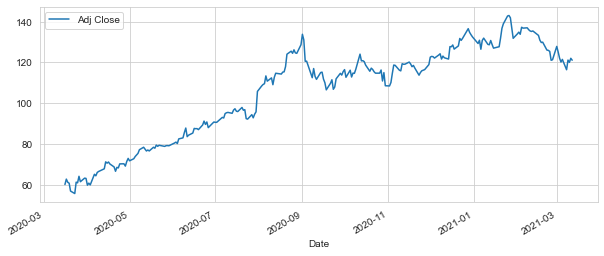

In [10]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

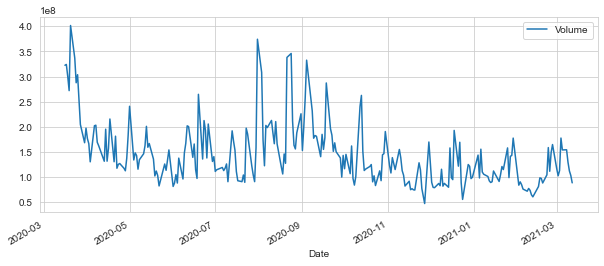

In [11]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

# moving average

In [15]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()
# old version:  AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

<AxesSubplot:xlabel='Date'>

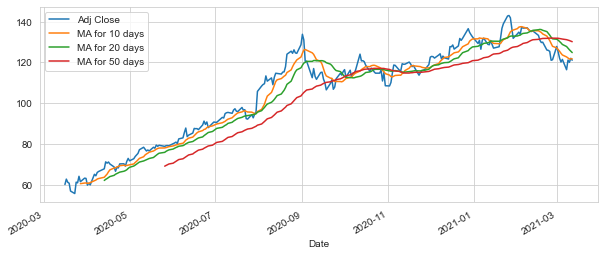

In [16]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

# daily return analysis


<AxesSubplot:xlabel='Date'>

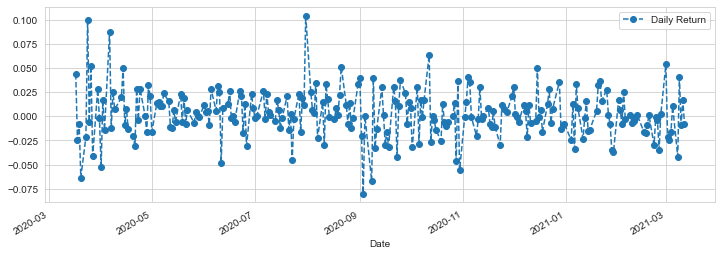

In [17]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

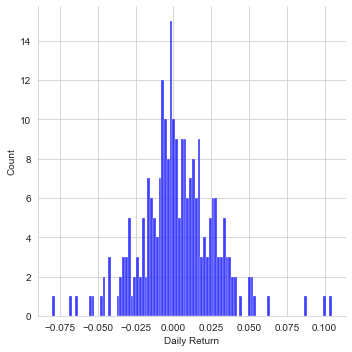

In [24]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

<AxesSubplot:>

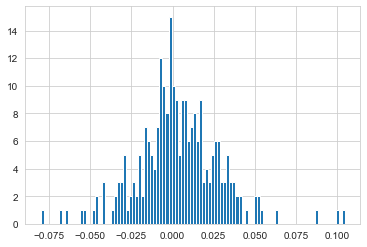

In [22]:
AAPL['Daily Return'].hist(bins=100)

In [25]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [26]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-03-16,60.086731,1084.329956,134.057693,1689.150024
2020-03-17,62.728752,1119.800049,145.095551,1807.839966
2020-03-18,61.193157,1096.800049,138.987595,1830.000000
2020-03-19,60.724293,1115.290039,141.274368,1880.930054
2020-03-20,56.869179,1072.319946,135.968292,1846.089966


In [27]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [28]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-03-16,NaN,NaN,NaN,NaN
2020-03-17,0.043970,0.032712,0.082337,0.070266
2020-03-18,-0.024480,-0.020539,-0.042096,0.012258
2020-03-19,-0.007662,0.016858,0.016453,0.027831
2020-03-20,-0.063486,-0.038528,-0.037559,-0.018523


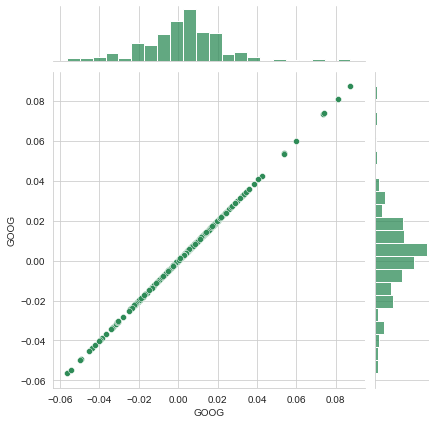

In [33]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

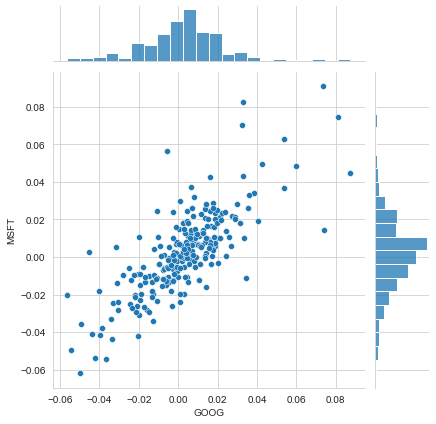

In [38]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')


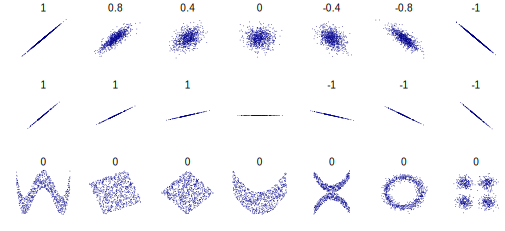

In [39]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

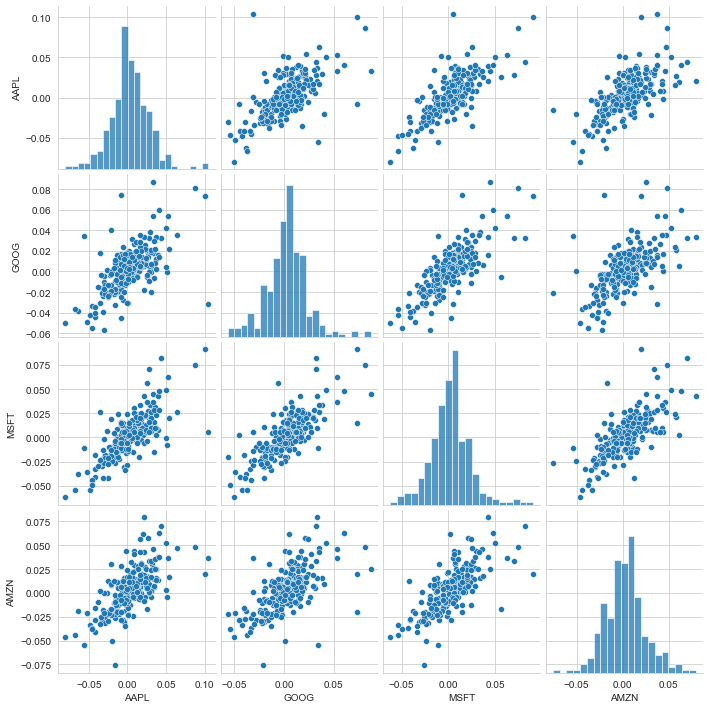

In [40]:
sns.pairplot(tech_rets.dropna())

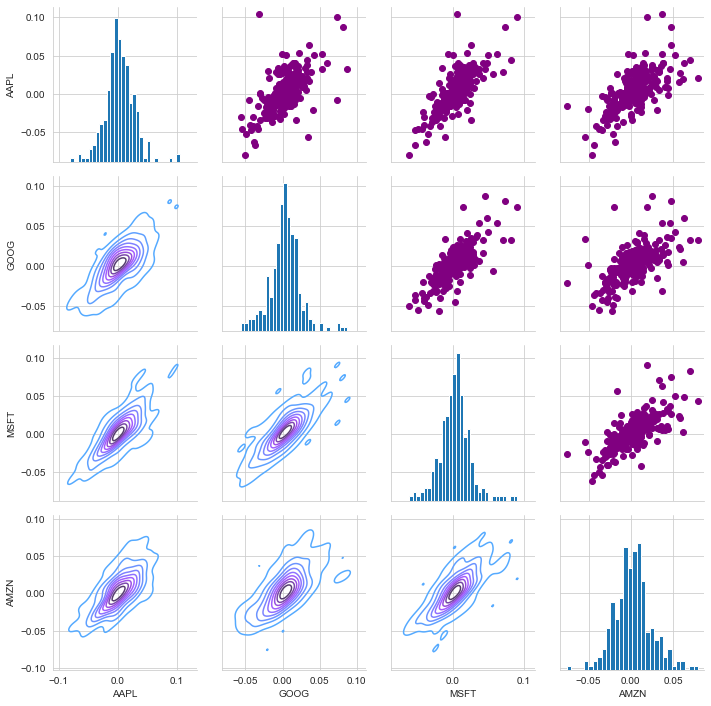

In [41]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

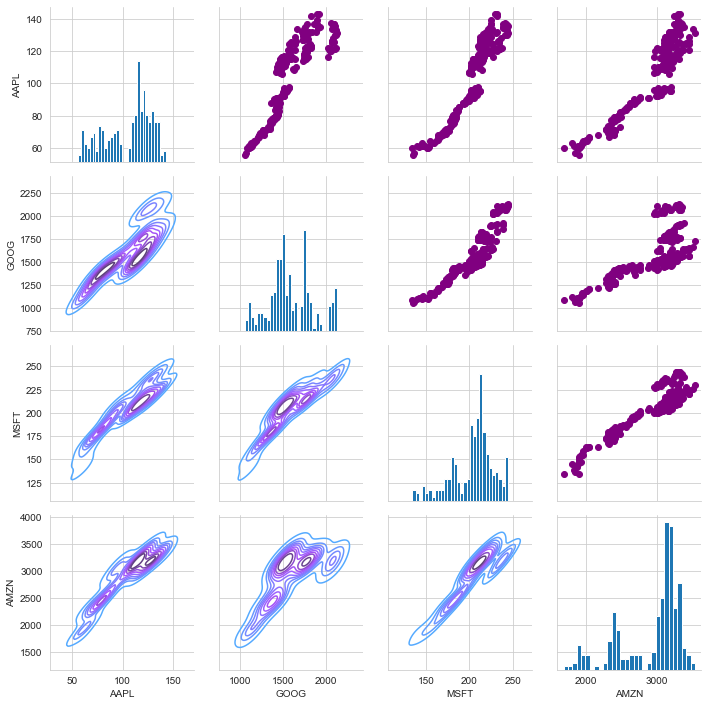

In [42]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

# Risk analysis

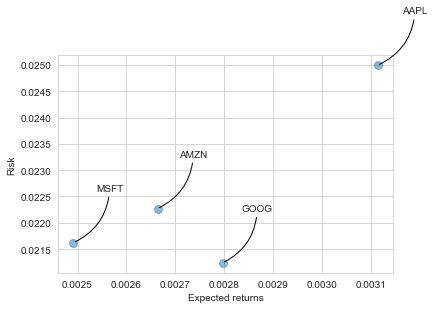

In [59]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
#plt.ylim([0.01,0.040])
#plt.xlim([-0.003,0.006])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))

# Value at Risk

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

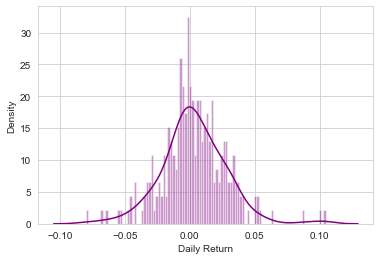

In [57]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [60]:
rets['AAPL'].quantile(0.05)

-0.0348940497879682

In [61]:
days = 365


dt = 1/days


mu = rets.mean()['GOOG']


sigma = rets.std()['GOOG']

In [67]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [63]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-16,1152.266968,1074.439941,1096.000000,1084.329956,4252400,1084.329956
2020-03-17,1130.859985,1056.010010,1093.109985,1119.800049,3861500,1119.800049
2020-03-18,1106.500000,1037.280029,1056.510010,1096.800049,4233400,1096.800049
2020-03-19,1157.969971,1060.108032,1093.050049,1115.290039,3651100,1115.290039
2020-03-20,1143.989990,1065.489990,1135.719971,1072.319946,3601800,1072.319946


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

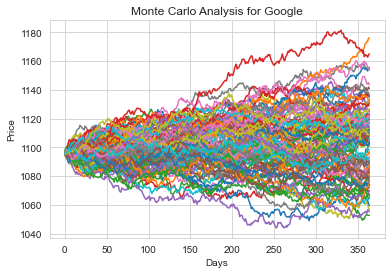

In [68]:
start_price = 1096

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [69]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

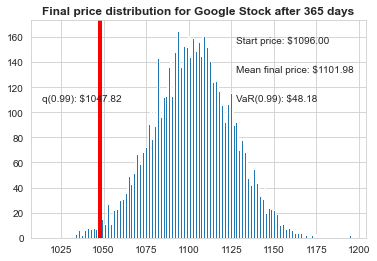

In [70]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');